In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
print(torch.__version__)

2.0.0


## Creating a range, reshaping a tensor

In [2]:
X = torch.arange(0,10,1)
#X_reshaped= X.reshape(2,5)
#X_reshaped

## Creating a view of a tensor

In [3]:
x = X
z = x.view(1,10)
z[0,1] = 5
x

tensor([0, 5, 2, 3, 4, 5, 6, 7, 8, 9])

## Stacking tensors

In [4]:
x_stacked = torch.stack([x,x,x]) #vertical stacking
x_stacked

tensor([[0, 5, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 5, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 5, 2, 3, 4, 5, 6, 7, 8, 9]])

In [5]:
x_stacked2 = torch.stack([x,x],dim=1)
x_stacked2

tensor([[0, 0],
        [5, 5],
        [2, 2],
        [3, 3],
        [4, 4],
        [5, 5],
        [6, 6],
        [7, 7],
        [8, 8],
        [9, 9]])

In [6]:
x_stacked2.shape
x_stacked2 = x_stacked2.reshape(1,2,5,2)
x_stacked2

tensor([[[[0, 0],
          [5, 5],
          [2, 2],
          [3, 3],
          [4, 4]],

         [[5, 5],
          [6, 6],
          [7, 7],
          [8, 8],
          [9, 9]]]])

# Squeezing & Unsqueezing

In [7]:
y = x_stacked2.squeeze()
print(f"previous shape: {y.shape}")
z = y.unsqueeze(dim=0)
print(f"current shape: {z.shape}")

previous shape: torch.Size([2, 5, 2])
current shape: torch.Size([1, 2, 5, 2])


## Permuting a tensor

In [8]:
#torch.permute rearranges the dimensions of a specified tensor in a specfic order, and it returns a view
x = torch.rand(2,3,5)
x.size()
torch.permute(x,(2,0,1)).size()
x = torch.rand(size = (224,224,3))

y = x.permute(2,0,1)
y.shape

torch.Size([3, 224, 224])

In [9]:
x[:,:1] = 5
x

tensor([[[5.0000, 5.0000, 5.0000],
         [0.1319, 0.3404, 0.1920],
         [0.7976, 0.0509, 0.5842],
         ...,
         [0.1682, 0.5664, 0.7417],
         [0.5239, 0.1976, 0.2235],
         [0.3464, 0.8754, 0.9303]],

        [[5.0000, 5.0000, 5.0000],
         [0.2041, 0.2368, 0.2028],
         [0.9209, 0.3841, 0.4980],
         ...,
         [0.3294, 0.6556, 0.8304],
         [0.5501, 0.3222, 0.8065],
         [0.4945, 0.7263, 0.5255]],

        [[5.0000, 5.0000, 5.0000],
         [0.4158, 0.6153, 0.7000],
         [0.4953, 0.5333, 0.2269],
         ...,
         [0.7631, 0.6290, 0.6250],
         [0.7549, 0.4125, 0.8976],
         [0.3514, 0.0691, 0.3468]],

        ...,

        [[5.0000, 5.0000, 5.0000],
         [0.8879, 0.6144, 0.4489],
         [0.4970, 0.7900, 0.2431],
         ...,
         [0.8181, 0.6226, 0.9780],
         [0.5971, 0.2007, 0.2437],
         [0.8679, 0.9580, 0.9508]],

        [[5.0000, 5.0000, 5.0000],
         [0.0409, 0.6717, 0.3884],
         [0.

## Checking if a gpu is available

In [10]:
torch.cuda.is_available()

True

## Random seeds

In [11]:
import random
torch.manual_seed(seed = 30)
x = torch.rand(2,4)
torch.manual_seed(seed = 30)
y= torch.rand(2,4)
x,y

(tensor([[0.9007, 0.7464, 0.4716, 0.8738],
         [0.7403, 0.7840, 0.8946, 0.6238]]),
 tensor([[0.9007, 0.7464, 0.4716, 0.8738],
         [0.7403, 0.7840, 0.8946, 0.6238]]))

In [12]:
a = torch.rand(7,7,)
b = torch.arange(0,7,1) #arange creates int64 rand ccreates flot32
a.dtype,b.dtype

(torch.float32, torch.int64)

## Transposing tensors

In [13]:
# to fix this
b = b.type(torch.float32)
b = b.reshape(1,7)
c = a@b.T

In [14]:
#to fix the shape error
c =a@b.T
c.size()

torch.Size([7, 1])

import random
torch.manual_seed(seed = 0)
d = torch.rand(7,7)
torch.manual_seed(seed = 0)
e = torch.rand(1,7)
print(d,e)
f = d@e.T
print(f)
d==e

In [15]:
x = torch.rand(1,3,3)
x

tensor([[[0.8184, 0.5022, 0.1390],
         [0.6871, 0.2544, 0.9488],
         [0.5232, 0.9378, 0.1448]]])

In [16]:
x[:,:,2]

tensor([[0.1390, 0.9488, 0.1448]])

## pytorch and numpy

In [17]:
v = np.arange(0,10)
c = torch.from_numpy(v).type(torch.float32) #numpy's default is float 64
v,c

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [18]:
v += 1
v,c

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [19]:
m = torch.zeros(3,3)
m

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [20]:
k = m.numpy()
m += 1
m,k

(tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=float32))

In [21]:
m+=2
m,k
k+=1
k,m

(array([[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]], dtype=float32),
 tensor([[4., 4., 4.],
         [4., 4., 4.],
         [4., 4., 4.]]))

In [22]:
#reproducibility
torch.manual_seed(6)
x = torch.rand(2,2)
torch.manual_seed(6)
y = torch.rand(2,2)
x == y

tensor([[True, True],
        [True, True]])

In [23]:
torch.cuda.is_available()

True

In [24]:
x.device

device(type='cpu')

## First pytorch model, linear regression

In [25]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [26]:
torch.__version__

'2.0.0'

In [27]:
#creating known parameters
weight = 0.7 #(slope)
bias = 0.3 #(error_term)

#creating some data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X+bias
X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [28]:
y.shape

torch.Size([50, 1])

In [29]:
# splitting into training and test sets
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
X_train.shape,y_test.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

In [30]:
def plo(traind,
        trainl,
        testd,
        testl,
        pred=None):
    plt.figure(figsize=(10,7))
    plt.scatter(traind,trainl,c="r",s=4,label="train")
    plt.scatter(testd,testl,c="c",s=3,label="test")
    if pred is not None:
        plt.scatter(testd,pred,c="b",s=2,label="predictions")
    plt.legend(prop={"size":14});
    

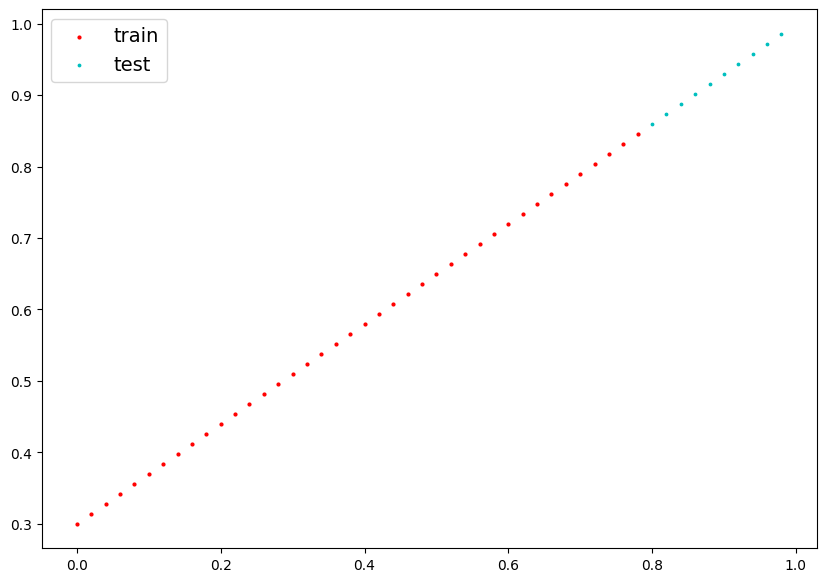

In [31]:
plo(X_train,y_train,X_test,y_test)

### Creating the model

In [32]:
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [33]:
torch.manual_seed(42)
mod = LinearRegressionModel()
list(mod.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [34]:
 mod.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## using torch.inference_mode() to make predictiions

In [35]:
with torch.inference_mode(): #tells the model to not keep track of the gradient
    y_preds = mod(X_test)
((abs(y_preds - y_test) / y_test)).mean()

tensor(0.5358)

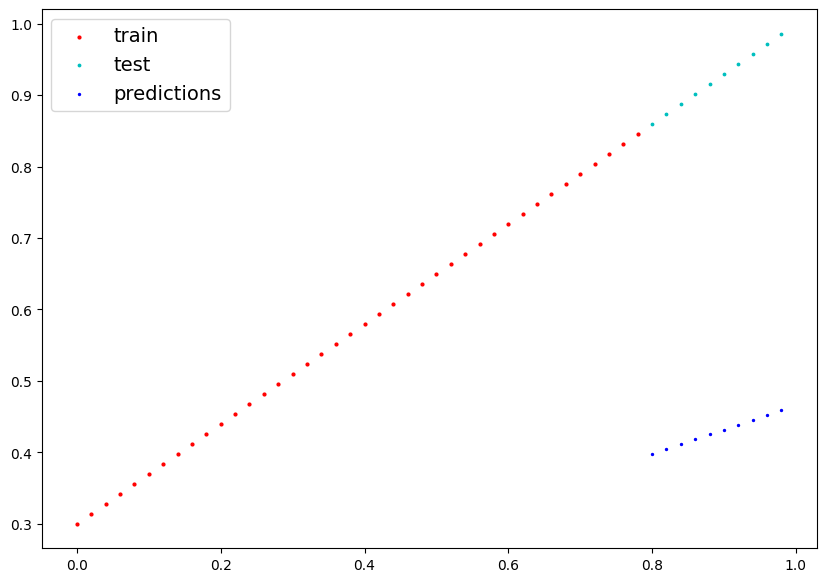

In [36]:
plo(X_train,y_train,X_test,y_test,y_preds)

## training
we can measure error using loss functions, cost functions, criterions
**optimisers**: take into account previous params and then fixes them to better match

In [37]:
mod.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [38]:
# setting up loss function
loss_fn = nn.L1Loss()
# setting up optimiser
optimizer = torch.optim.SGD(params=mod.parameters(),lr=0.01,)

In [39]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Train Test Loop

In [40]:
torch.manual_seed(42)
#Building a training loop

epochs = 301
#tracking progress
epoch_count = []
loss_values=[]
test_loss_values=[]

# an epoch is a loop through the data
# step 0 loop through data
for epoch in range(epochs):
    #set model to training mode
    mod.train()
    #forward pass
    y_pred = mod(X_train)
    #calculate loss
    loss = loss_fn(y_pred,y_train)
    print(f"Loss :{loss}")
    #optimizer zero grad
    optimizer.zero_grad()
    #back propagation
    loss.backward()
    #perform gradient descent
    optimizer.step()
    # testing
    mod.eval()
    with torch.inference_mode():
        test_pred = mod(X_test)
        test_loss = loss_fn(test_pred,y_test)
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"epoch {epoch} | loss {loss}| test loss {test_loss} |params:{mod.state_dict()}")
        
    

Loss :0.31288138031959534
epoch 0 | loss 0.31288138031959534| test loss 0.48106518387794495 |params:OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss :0.3013603389263153
Loss :0.28983935713768005
Loss :0.2783183455467224
Loss :0.26679736375808716
Loss :0.2552763521671295
Loss :0.24375534057617188
Loss :0.23223432898521423
Loss :0.22071333229541779
Loss :0.20919232070446014
Loss :0.1976713240146637
epoch 10 | loss 0.1976713240146637| test loss 0.3463551998138428 |params:OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss :0.18615034222602844
Loss :0.1746293306350708
Loss :0.16310831904411316
Loss :0.1515873372554779
Loss :0.14006635546684265
Loss :0.1285453587770462
Loss :0.11702437698841095
Loss :0.1060912236571312
Loss :0.09681284427642822
Loss :0.08908725529909134
epoch 20 | loss 0.08908725529909134| test loss 0.21729660034179688 |params:OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss :0.0822758302092

In [41]:
#plot loss curves


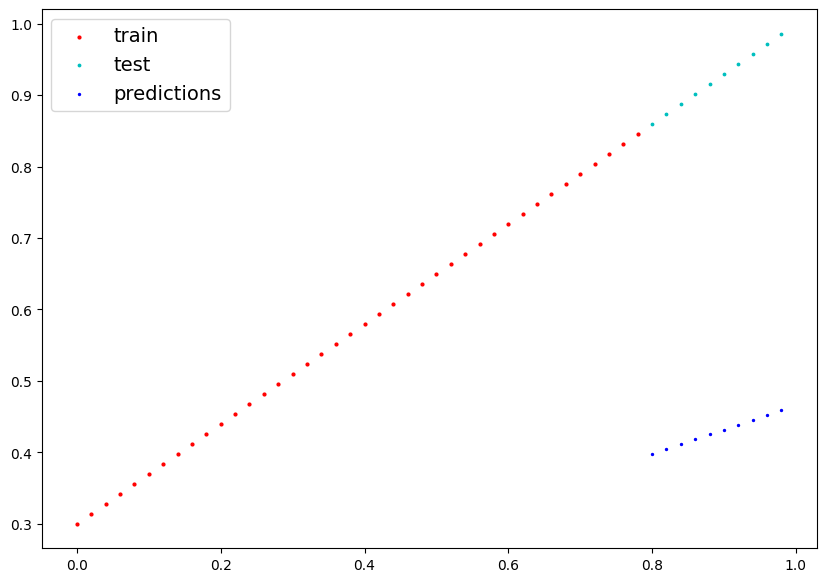

In [42]:
plo(X_train,y_train,X_test,y_test,y_preds)

In [43]:
with torch.inference_mode():
    y_preds_new = mod(X_test)

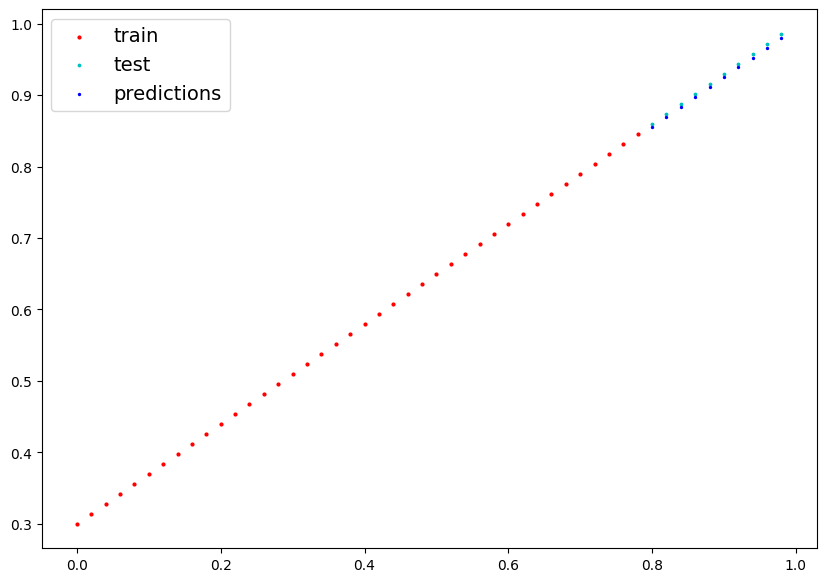

In [44]:
plo(X_train,y_train,X_test,y_test,y_preds_new)

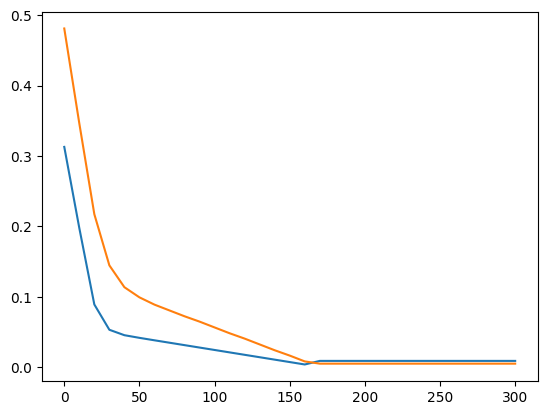

In [45]:
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).cpu().numpy()),label="Train")
plt.plot(epoch_count,test_loss_values,label="Test loss")

## saving a pytorch model

three main methods: 
- torch.save(): save a pytorch object in pythons pickle format
- torch.load(): allows you load a saved pytorch object
- torch.nn.Module.load_state_dict():this allows to load a model's saved state dictionary


### Saving & Loading Models

In [46]:
from pathlib import Path
mod_name = "first_pytorch_model.pth"
mod_path = "/kaggle/working/"+"mod_name"
torch.save(mod.state_dict(),mod_path)



In [47]:
loaded_mod = LinearRegressionModel()
loaded_mod.load_state_dict(torch.load(mod_path))

<All keys matched successfully>

In [48]:
loaded_mod.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

## Device agnostic set-up

In [49]:
import torch
import numpy
import matplotlib.pyplot as plt
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device {device}")

using device cuda


In [50]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [51]:
X_train.device,X_test.device,y_train.device,y_test.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [52]:
#you didnt have to do this tbh could have just moved the cpu model to cuda
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        #using nn.Linear() for creating model params
        self.linear_layer = nn.Linear(in_features=1,out_features=1)
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
    
torch.manual_seed(42)
mod = LinearRegression()
mod = mod.to(device)
mod,mod.state_dict(),next(mod.parameters()).device
        

(LinearRegression(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.8300], device='cuda:0'))]),
 device(type='cuda', index=0))

In [53]:
# setting up loss function
loss_fn = nn.L1Loss()
# setting up optimiser
optimizer = torch.optim.SGD(params=mod.parameters(),lr=0.001,)

In [54]:
torch.manual_seed(42)
epochs = 1200
epoch_count=[]
loss_values=[]
test_loss_values=[]

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):
    mod.train()
    new_pred = mod(X_train)
    loss = loss_fn(new_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    mod.eval()
    with torch.inference_mode():
        test_pred = mod(X_test)
        test_loss = loss_fn(test_pred,y_test)
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"Epoch {epoch} | Training loss {loss} | Test loss {test_loss} |params:{mod.state_dict()}")
            
    

Epoch 0 | Training loss 0.5551779866218567 | Test loss 0.5861001014709473 |params:OrderedDict([('linear_layer.weight', tensor([[0.7641]], device='cuda:0')), ('linear_layer.bias', tensor([0.8290], device='cuda:0'))])
Epoch 10 | Training loss 0.5436570644378662 | Test loss 0.5726293921470642 |params:OrderedDict([('linear_layer.weight', tensor([[0.7602]], device='cuda:0')), ('linear_layer.bias', tensor([0.8190], device='cuda:0'))])
Epoch 20 | Training loss 0.5321362614631653 | Test loss 0.5591585040092468 |params:OrderedDict([('linear_layer.weight', tensor([[0.7563]], device='cuda:0')), ('linear_layer.bias', tensor([0.8090], device='cuda:0'))])
Epoch 30 | Training loss 0.5206153988838196 | Test loss 0.5456876754760742 |params:OrderedDict([('linear_layer.weight', tensor([[0.7524]], device='cuda:0')), ('linear_layer.bias', tensor([0.7990], device='cuda:0'))])
Epoch 40 | Training loss 0.5090945363044739 | Test loss 0.5322169661521912 |params:OrderedDict([('linear_layer.weight', tensor([[0.74

In [55]:
with torch.inference_mode():
    y_preds = mod(X_test)

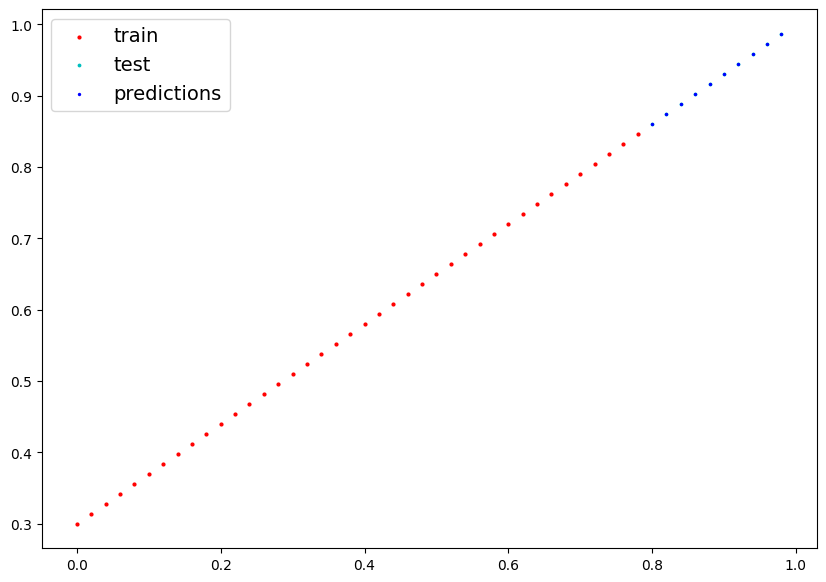

In [56]:
plo(X_train.to("cpu"),y_train.to("cpu"),X_test.to("cpu"),y_test.to("cpu"),y_preds.to("cpu"))

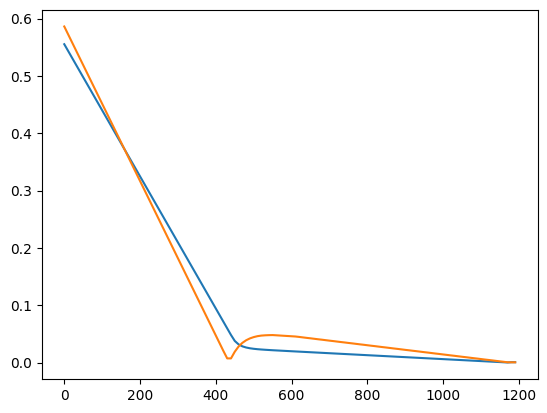

In [57]:
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).cpu().numpy()),label="Train")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).cpu().numpy()),label="Test loss")

In [58]:
model_path = Path(r"/kaggle/working/")
model_name = "first_mod_gpu.pth"
model_save_path = model_path/model_name
torch.save(mod.state_dict(),model_save_path)

In [59]:
model = LinearRegression()
model.load_state_dict(torch.load(r"/kaggle/working/first_mod_gpu.pth"))
model.state_dict()
print(next(model.parameters()))
model.to(device)
next(model.parameters())

Parameter containing:
tensor([[0.6999]], requires_grad=True)


Parameter containing:
tensor([[0.6999]], device='cuda:0', requires_grad=True)

In [60]:
with torch.inference_mode():
    a = mod(X_train)
    b = model(X_train)
    
a == b

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Classification